In [190]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [191]:
#defining function for reading dataset file
def getDataframeFromFile(filename):
    
    #reading csv file using pandas and generating dataframe
    df = pd.read_csv(filename)
    
    #returning dataframe
    return df

In [192]:
#defining function for group using column and getting count
def groupAndCount(df, grp_clmn, new_clmn):
    
    #group by column and getting each group size and generating new dataframe
    df = df.groupby(grp_clmn).size().reset_index(name=new_clmn)
    
    #returning dataframe
    return df

In [193]:
#defining function for calculation percentage of column
def calculatePercentage(df, p_clmn, n_clmn):
    
    #calculating percentage and generating new column
    df[n_clmn] = round((df[p_clmn] / df[p_clmn].sum()) * 100, 2)
    
    #returning dataframe
    return df

In [194]:
#defining function for dropping column from dataframe
def dropColumn(df, clmn_name):
    
    #drop column from dataframe
    df.drop(clmn_name,axis=1,inplace=True)
    
    #returning dataframe
    return df

In [195]:
#defining function for visualizing dataframe
def visualizeData(df, size_x, size_y, x_clmn, y_clmn, x_label, y_label, y_interval, bar_width):
    
    #setting figure size
    fig = plot.figure(figsize = (size_x, size_y))
    
    #setting Y- axes interval
    plot.yticks(np.arange(df[y_clmn].min(), df[y_clmn].max(), y_interval))
    
    #plotting bra graph
    plot.bar(df[x_clmn], df[y_clmn],width = bar_width)
    
    #setting X-axes label
    plot.xlabel(x_label)
    
    #setting Y-axes label
    plot.ylabel(y_label)

    #converting percentage column to list 
    percentage = df[y_clmn].tolist()
    
    #converting religion column to list
    religion = df[x_clmn].tolist()

    #assigning value of Y-axes on each bar of X-axes
    for i in range(len(percentage)):
        plot.annotate(str(percentage[i]), xy=(religion[i],percentage[i]), ha='center', va='bottom')
    
    #displaying graph
    plot.show()

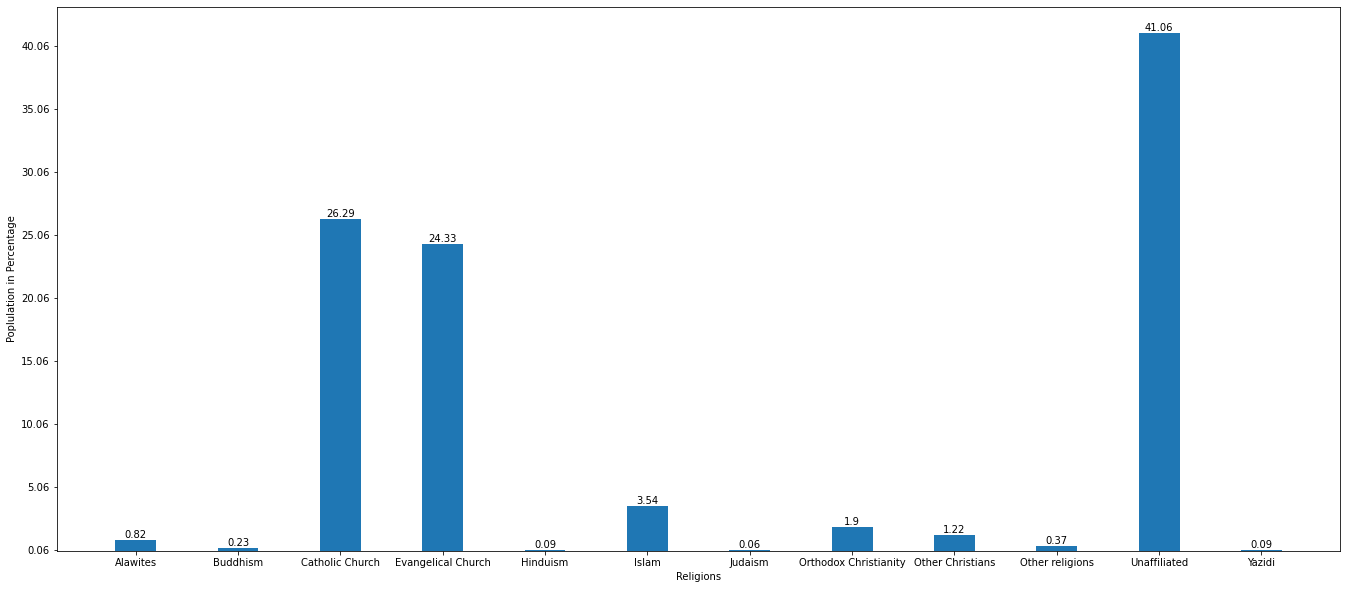

In [189]:
#checking if main function is executing
if __name__ == '__main__':
    
    #generate dataframe
    df = getDataframeFromFile(filename = 'data1.csv')
    
    #group and count column
    df = groupAndCount(df = df, grp_clmn = 'religion', new_clmn = 'rcount')
    
    #calculate percentage
    df = calculatePercentage(df = df, p_clmn = 'rcount', n_clmn = 'percentage')
    
    #remove column
    df = dropColumn(df = df, clmn_name = 'rcount')
    
    #display graph
    visualizeData(df = df, size_x = 23, size_y = 10, x_clmn = 'religion', y_clmn = 'percentage', 
                  x_label = 'Religions', y_label = 'Poplulation in Percentage', y_interval = 5, bar_width = 0.4)